# Introduction to Convolutional Neural Networks and Computer Vision with TensorFLow

Computer vision is the practice of writing algorithms which can discover patterns in visual data. Such as the camera of self-driving car recognizing the car in front.

## Get the data 

The images we're working with are from the Food101 dataset (101 different classes of food)

However we've modified it to only use two classes (pizza and steak).

**NOTE:** We start with a smaller dataset so we can experiment quickly and figure what works (or better yet what doesn't work) before scaling up.

In [8]:
import os
import zipfile
import wget

url = 'https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip'
filename = 'pizza_steak.zip'

# Download only if the file doesn't already exist
if not os.path.exists(filename):
    print("Downloading the file...")
    downloaded_file = wget.download(url)
else:
    print("File already exists, skipping download.")

# Unzip only if the zip file is present
if os.path.exists(filename):
    with zipfile.ZipFile(filename, 'r') as zip_ref:
        zip_ref.extractall()
    print("Extraction complete.")   

File already exists, skipping download.
Extraction complete.


## Inspect the data (become one with the data)

A very crucial step at the beginning of any machine learning project is becoming one with the data.

And for a computer vision project..... this usually means visualizing many samples of your data.


In [9]:
# Walk through pizza_steak directory and list number of files 
for dirpath, dirnames, filenames in os.walk('pizza_steak'):
    print(f'There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}')

There are 2 directories and 0 images in pizza_steak
There are 2 directories and 0 images in pizza_steak\test
There are 0 directories and 250 images in pizza_steak\test\pizza
There are 0 directories and 250 images in pizza_steak\test\steak
There are 2 directories and 0 images in pizza_steak\train
There are 0 directories and 750 images in pizza_steak\train\pizza
There are 0 directories and 750 images in pizza_steak\train\steak


In [11]:
# Another way to find out how many images in a file 
num_steak_images_train = len(os.listdir(path='pizza_steak/train/steak'))
num_steak_images_train

750

**To visualize our images, first let's get the class names programatically.**

In [111]:
# Get the classnames programatically
import pathlib 
import numpy as np 
data_dir = pathlib.Path('pizza_steak/train')
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
class_names

array(['pizza', 'steak'], dtype='<U5')

In [15]:
# Let's visualize our images 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg 
import random 

def view_random_image(target_dir, target_class:str):
    # Set the target directory (we'll view images from here)
    target_folder = target_dir + '/' + target_class
    print(target_folder)

    # Get a random image path 
    random_image = random.sample(os.listdir(target_folder), 1)
    print(random_image)

    # Read in the image and plot it using matplotlib
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off');

    print(f'Image shape: {img.shape}')
    return img 



pizza_steak/train/pizza
['2292986.jpg']
Image shape: (512, 512, 3)


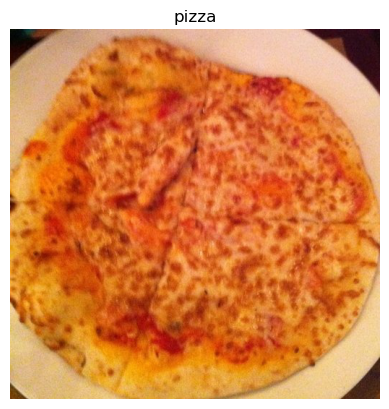

In [101]:
# View a random image from the training dataset 
img = view_random_image(target_dir='pizza_steak/train', target_class='pizza')

In [70]:
import tensorflow as tf 
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[33,  7, 16],
        [34,  8, 19],
        [34,  8, 19],
        ...,
        [32, 17, 40],
        [36, 21, 44],
        [41, 26, 49]],

       [[32,  5, 14],
        [35,  7, 19],
        [37, 11, 22],
        ...,
        [36, 21, 44],
        [40, 25, 48],
        [44, 29, 52]],

       [[36,  6, 16],
        [36,  8, 20],
        [38, 10, 22],
        ...,
        [41, 26, 49],
        [45, 30, 53],
        [48, 33, 56]],

       ...,

       [[12,  1,  9],
        [12,  1,  9],
        [12,  1,  9],
        ...,
        [15,  3, 13],
        [15,  3, 13],
        [16,  4, 14]],

       [[12,  1,  9],
        [13,  2, 10],
        [13,  2, 10],
        ...,
        [17,  5, 15],
        [16,  4, 14],
        [15,  3, 13]],

       [[13,  2, 10],
        [13,  2, 10],
        [13,  2, 10],
        ...,
        [19,  7, 17],
        [17,  5, 15],
        [15,  3, 13]]], dtype=uint8)>

In [71]:
# View the image shape 
img.shape # returns width, height, colour channels 

(512, 512, 3)

In [74]:
# Get all the pixel values between 0 and 1 
img / 225.

array([[[0.14666667, 0.03111111, 0.07111111],
        [0.15111111, 0.03555556, 0.08444444],
        [0.15111111, 0.03555556, 0.08444444],
        ...,
        [0.14222222, 0.07555556, 0.17777778],
        [0.16      , 0.09333333, 0.19555556],
        [0.18222222, 0.11555556, 0.21777778]],

       [[0.14222222, 0.02222222, 0.06222222],
        [0.15555556, 0.03111111, 0.08444444],
        [0.16444444, 0.04888889, 0.09777778],
        ...,
        [0.16      , 0.09333333, 0.19555556],
        [0.17777778, 0.11111111, 0.21333333],
        [0.19555556, 0.12888889, 0.23111111]],

       [[0.16      , 0.02666667, 0.07111111],
        [0.16      , 0.03555556, 0.08888889],
        [0.16888889, 0.04444444, 0.09777778],
        ...,
        [0.18222222, 0.11555556, 0.21777778],
        [0.2       , 0.13333333, 0.23555556],
        [0.21333333, 0.14666667, 0.24888889]],

       ...,

       [[0.05333333, 0.00444444, 0.04      ],
        [0.05333333, 0.00444444, 0.04      ],
        [0.05333333, 0

## An end-to-end example

Let's build a convolutional neural network to find patterns in our images, more specifically we need a way:
- Load our images
- Preprocess our images
- Build a CNN to find patterns in our images
- Compile our CNN
- Fit the CNN to our training data

In [3]:
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set the seed 
tf.random.set_seed(42)

# Preprocess data (get all pixel values between 0 and 1)
train_datagen = ImageDataGenerator(rescale=1./255.)
valid_datagen = ImageDataGenerator(rescale=1./255.)

# Setup paths to our data directories
train_dir = 'pizza_steak/train'
test_dir = 'pizza_steak/test'
# Import data from directories and turn in into batches 
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                              batch_size=32,
                                              shuffle=True,
                                              target_size=(224, 224),
                                              class_mode='binary',
                                              seed=42)
valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                             batch_size=32,
                                             shuffle=False,
                                             target_size=(224, 224),
                                             class_mode='binary',
                                             seed=42)


# Build a CNN Model (same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential(
    [
        tf.keras.layers.Input(shape=(224, 224, 3)),
        tf.keras.layers.Conv2D(filters=10,
                              kernel_size=3,
                              activation='relu'),
        tf.keras.layers.Conv2D(10, 3, activation='relu'),
        tf.keras.layers.MaxPool2D(pool_size=2,
                                 padding='valid'),
        tf.keras.layers.Conv2D(10, 3, activation='relu'),
        tf.keras.layers.Conv2D(10, 3, activation='relu'),
        tf.keras.layers.MaxPool2D(2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ]
)


# Compile our CNN 
model_1.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

# Fit the model 
history_1 = model_1.fit(train_data,
                       epochs=5,
                       steps_per_epoch=len(train_data),
                       validation_data=valid_data,
                       validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


C:\Users\yashs\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 13s 238ms/step - accuracy: 0.6397 - loss: 0.6268 - val_accuracy: 0.7660 - val_loss: 0.4820
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 227ms/step - accuracy: 0.7541 - loss: 0.5180 - val_accuracy: 0.7820 - val_loss: 0.4733
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 231ms/step - accuracy: 0.7772 - loss: 0.4763 - val_accuracy: 0.8020 - val_loss: 0.4242
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 237ms/step - accuracy: 0.8083 - loss: 0.4416 - val_accuracy: 0.8520 - val_loss: 0.3740
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 236ms/step - accuracy: 0.8319 - loss: 0.3666 - val_accuracy: 0.8420 - val_loss: 0.3751


<Axes: >

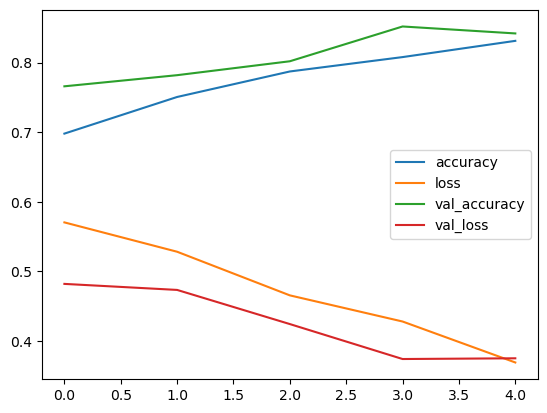

In [4]:
import pandas as pd 
pd.DataFrame(history_1.history).plot()

In [5]:
model_1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 110, 110, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 108, 108, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 106, 106, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 53, 53, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 28090)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │          28,091 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)

## Using the same model as before

Let's replicate the model we've build in a previous section to see if it works with our image data.


In [6]:
# Set random seed 
tf.random.set_seed(42)

# Create a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(224, 224, 3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
    
])

model_2.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

# Fit the model
history_2 = model_2.fit(train_data,
                       epochs=5,
                       steps_per_epoch=len(train_data),
                       validation_data=valid_data,
                       validation_steps=len(valid_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 159ms/step - accuracy: 0.4662 - loss: 1.6532 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 166ms/step - accuracy: 0.4901 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 161ms/step - accuracy: 0.5033 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 164ms/step - accuracy: 0.4977 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 155ms/step - accuracy: 0.4980 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931


<Axes: >

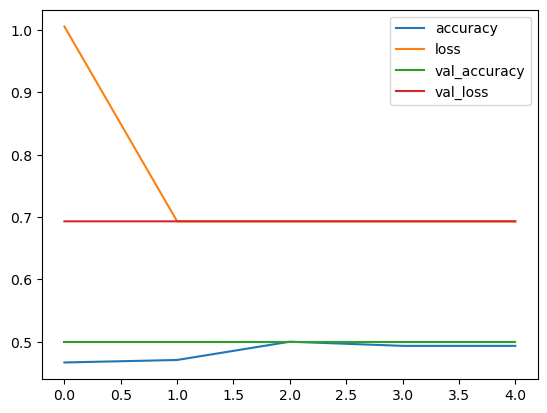

In [7]:
pd.DataFrame(history_2.history).plot()

**It's just guessing just like flip a coin**

In [8]:
# Get a summary of model_2
model_2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 150528)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │         602,116 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,806,425 (6.89 MB)

 Trainable params: 602,141 (2.30 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,204,284 (4.59 MB)

**Despite having 20x more params than our CNN (model_1), model_2 performs teribly let's try to improve it**

In [9]:
# Set the random seed 
tf.random.set_seed(42)

# Create the model (same as above but let's step it up a notch)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(224, 224, 3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model 
model_3.compile(loss='binary_crossentropy',
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

# Fit the model 
history_3 = model_3.fit(train_data, 
                       epochs=5,
                       validation_data=valid_data,
                       steps_per_epoch=len(train_data),
                       validation_steps=len(valid_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 12s 237ms/step - accuracy: 0.5840 - loss: 4.2017 - val_accuracy: 0.6780 - val_loss: 0.7611
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 212ms/step - accuracy: 0.6812 - loss: 0.9136 - val_accuracy: 0.7200 - val_loss: 0.7118
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 212ms/step - accuracy: 0.7301 - loss: 0.8603 - val_accuracy: 0.6640 - val_loss: 0.6560
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 216ms/step - accuracy: 0.6974 - loss: 0.7522 - val_accuracy: 0.7480 - val_loss: 0.6701
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 215ms/step - accuracy: 0.7076 - loss: 1.1063 - val_accuracy: 0.6240 - val_loss: 1.1599


<Axes: >

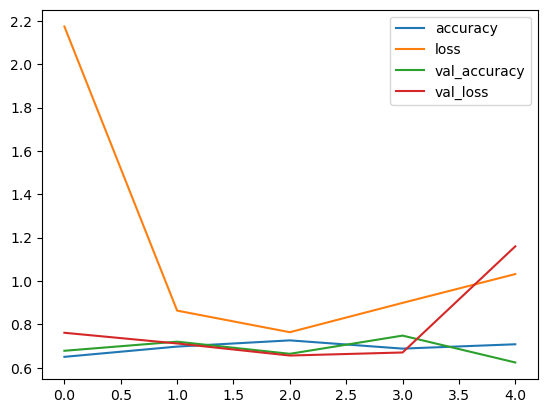

In [10]:
pd.DataFrame(history_3.history).plot()

In [11]:
model_3.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)                  │ (None, 150528)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 100)                 │      15,052,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 45,219,605 (172.50 MB)

 Trainable params: 15,073,201 (57.50 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 30,146,404 (115.00 MB)

**Around 1 crore params Over 500 times more that conv neural network still not good than our model_1 (CNN)**

**This proves that more parameters does not always mean that the model will be better**

In [12]:
model_1.summary() 

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 110, 110, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 108, 108, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 106, 106, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 53, 53, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 28090)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │          28,091 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)

## Binary Classification: Let's Break it down

1. Become one with the data (visualize, visualize, visualize)
2. Preprocess the data (prepared it for our model, the main step here was scaling/normlizing)
3. Create a model (start with a baseline) 
4. Fit the model 
5. Evaluate the model 
6. Adjust different parameters and improve the model (try to beat our baseline)
7. Repeat until satisfied (experiment, experiment, experiment)

### 1. Become one with the data

pizza_steak/train/steak
['2938151.jpg']
Image shape: (512, 512, 3)
pizza_steak/train/pizza
['132554.jpg']
Image shape: (512, 384, 3)


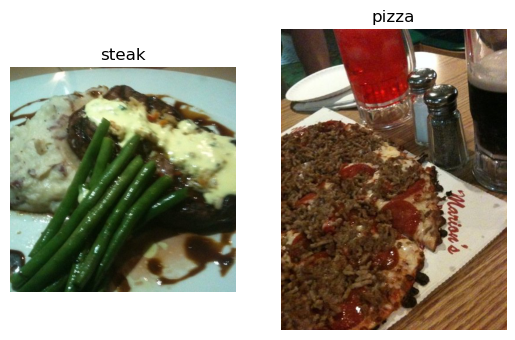

In [17]:
import matplotlib.pyplot as plt
import os 
# Visualize data 

plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image('pizza_steak/train', 'steak')
plt.subplot(1, 2, 2)
pizza_img = view_random_image('pizza_steak/train', 'pizza')

**`'1407753.jpg'`, `3401767.jpg` , `3826377.jpg`, `'165964.jpg'`, `1340977.jpg` i found something interesting in these image**

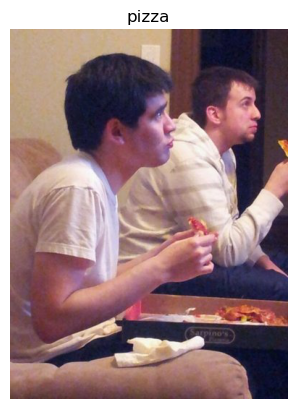

In [18]:
img = mpimg.imread('pizza_steak/train/pizza' + "/" + '1407753.jpg')
plt.imshow(img)
plt.title('pizza')
plt.axis('off');

the red thing migh look like steak shape that can confuse the model


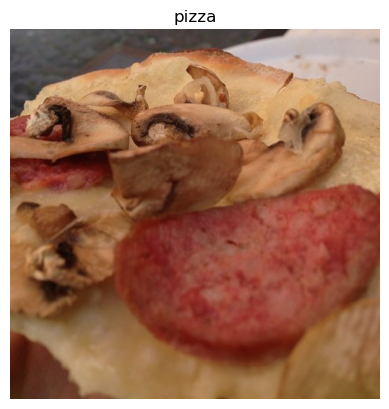

In [19]:
img = mpimg.imread('pizza_steak/train/pizza' + "/" + '3401767.jpg')
plt.imshow(img)
plt.title('pizza')
plt.axis('off');
print('the red thing migh look like steak shape that can confuse the model')

this is a pizza and steak shop not actual pizza neither steak....


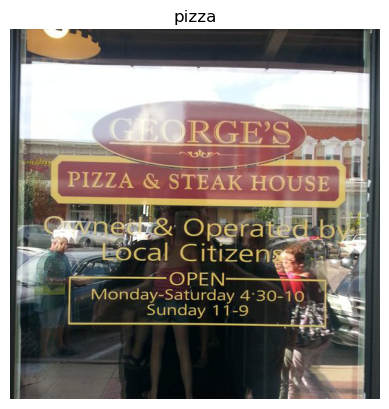

In [20]:
img = mpimg.imread('pizza_steak/train/pizza' + "/" + '3826377.jpg')
plt.imshow(img)
plt.title('pizza')
plt.axis('off');
print('this is a pizza and steak shop not actual pizza neither steak....')


is this really a steak??? haha i don"t think so


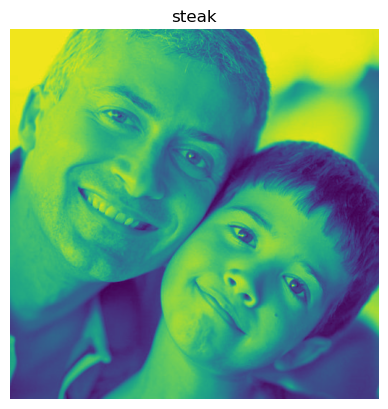

In [21]:
img = mpimg.imread('pizza_steak/train/steak' + "/" + '1340977.jpg')
plt.imshow(img)
plt.title('steak')
plt.axis('off');

print('is this really a steak??? haha i don"t think so')

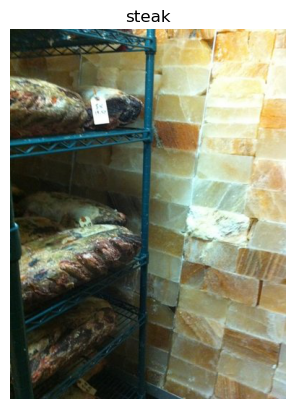

In [22]:
img = mpimg.imread('pizza_steak/train/steak' + "/" + '165964.jpg')
plt.imshow(img)
plt.title('steak')
plt.axis('off');


### 2. Preprocess the data (prepare it for a model)

In [24]:
import pathlib
# Define directory dataset paths 
train_dir = pathlib.Path('pizza_steak/train')
test_dir = pathlib.Path('pizza_steak/test')

**Our next step is to turn our data into batches**

A batch is a small subset of data. Rather than look at all ~10,000 images at one time, a model might look at 32 images at a time.

It does this for a couple of reasons:

1. 10,000 images (or more) might not fit into memory of your processor (GPU).
2. Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well.

Why 32?

Because 32 is good for your health haha No because Yann LeCun said that.

In [25]:
# Create train and test data generators and rescale the data 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [26]:
# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                              target_size=(224, 224),
                                              class_mode='binary',
                                              batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                            target_size=(224, 224),
                                            class_mode='binary',
                                            batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [27]:
# Get a sample of a train data batch 
images, labels = next(train_data)
len(images), len(labels)

(32, 32)

In [28]:
images.shape, labels.shape

((32, 224, 224, 3), (32,))

In [29]:
# How many batches are there 
len(train_data)

47

In [30]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.01568628, 0.01568628, 0.01568628],
          [0.01568628, 0.01568628, 0.01568628],
          [0.01568628, 0.01568628, 0.01568628],
          ...,
          [0.2509804 , 0.25490198, 0.2627451 ],
          [0.24313727, 0.24705884, 0.25490198],
          [0.2392157 , 0.23529413, 0.25490198]],
 
         [[0.01568628, 0.01568628, 0.01568628],
          [0.01568628, 0.01568628, 0.01568628],
          [0.01568628, 0.01568628, 0.01568628],
          ...,
          [0.24705884, 0.2509804 , 0.25882354],
          [0.227451  , 0.23137257, 0.2392157 ],
          [0.21176472, 0.20784315, 0.227451  ]],
 
         [[0.01568628, 0.01568628, 0.01568628],
          [0.01568628, 0.01568628, 0.01568628],
          [0.01568628, 0.01568628, 0.01568628],
          ...,
          [0.24705884, 0.2509804 , 0.25882354],
          [0.22352943, 0.227451  , 0.23529413],
          [0.20000002, 0.19607845, 0.21568629]],
 
         ...,
 
         [[0.3372549 , 0.34901962, 0.37647063],
          [0.33725

### 3. Create a CNN Model (start with a baseline)

A baseline is a relatively simple model or existing result that you setup when beginning a machine learning experimenet and then as you keep experimenting, you try to beat baseline.

> **NOTE:** In deep learning there is almost infinite amount of architecture you could create so one of the best ways to get started is to start with something simple and see if it works on your data and then introduce complexity as required (e.g look at which current model is performing best in the field of your problem.)

In [31]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation, Input
from tensorflow.keras import Sequential

In [32]:
# Create the model (this will be our baseline, a 3 layer convolutional NN)
model_4 = Sequential([
    Input(shape=(224, 224, 3)),
    Conv2D(filters=10,
          kernel_size=3,
          strides=1,
          padding='valid',
          activation='relu'),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    Flatten(),
    Dense(1, activation='sigmoid')
])

In [33]:
# Compile the model 
model_4.compile(loss='binary_crossentropy',
               optimizer=Adam(),
               metrics=['accuracy'])



### Fit the model 

In [34]:
# Fit the model 
history_4 = model_4.fit(train_data, epochs=5, validation_data=valid_data, steps_per_epoch=len(train_data), 
           validation_steps=len(valid_data))

C:\Users\yashs\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 13s 249ms/step - accuracy: 0.6088 - loss: 1.9787 - val_accuracy: 0.7580 - val_loss: 0.4693
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 240ms/step - accuracy: 0.7822 - loss: 0.4583 - val_accuracy: 0.8320 - val_loss: 0.3739
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 12s 245ms/step - accuracy: 0.8262 - loss: 0.4080 - val_accuracy: 0.7980 - val_loss: 0.4195
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 243ms/step - accuracy: 0.8972 - loss: 0.2830 - val_accuracy: 0.8200 - val_loss: 0.3946
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 12s 247ms/step - accuracy: 0.9493 - loss: 0.1541 - val_accuracy: 0.8300 - val_loss: 0.4220


### 5. Evaluating our model

it looks like our model is learning something, let's evaluate it.

<Axes: >

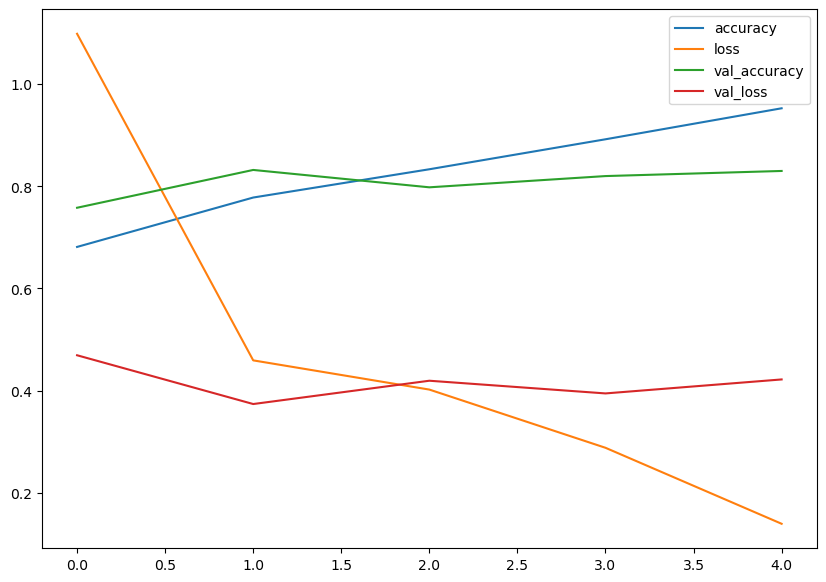

In [35]:
# let's plot the training curves
pd.DataFrame(history_4.history).plot(figsize=(10, 7))

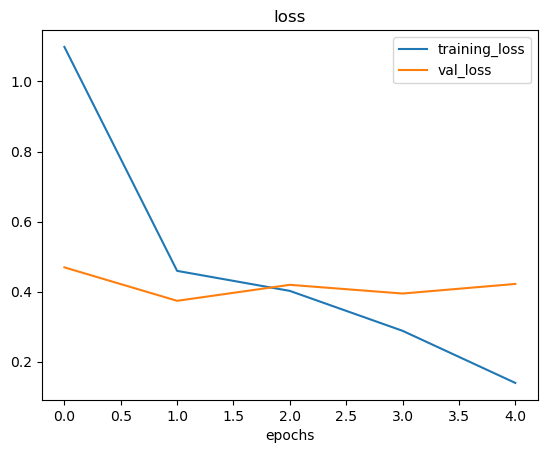

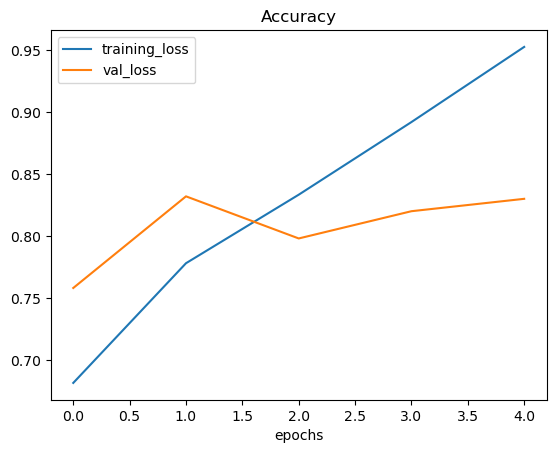

In [36]:
# Plot the validation and training curves separately 
def plot_loss_curves(history):
    """
    Returns seperate loss curves for training and validation metrics.
    """
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(len(history.history['loss']))

    # Plot loss 
    plt.plot(epochs, loss, label='training_loss')
    plt.plot(epochs, val_loss, label='val_loss')
    plt.title('loss')
    plt.xlabel('epochs')
    plt.legend()

    # Plot Accuracy 
    plt.figure()
    plt.plot(epochs, accuracy, label='training_loss')
    plt.plot(epochs, val_accuracy, label='val_loss')
    plt.title('Accuracy')
    plt.xlabel('epochs')
    plt.legend();

plot_loss_curves(history_4)

**Highly Overfitting**

In [39]:
model_1.evaluate(test_data), model_4.evaluate(test_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 118ms/step - accuracy: 0.8196 - loss: 0.4022
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 131ms/step - accuracy: 0.8138 - loss: 0.4262


([0.3750506639480591, 0.8420000076293945],
 [0.4220011234283447, 0.8299999833106995])

**Model_1 results are still better**

### 6. Adjust the model parameters

Fitting a machine learning model comes in 3 steps:

0. Create a baseline 
1. Beat the baseline by overfitting a larger model.
2. Reduce overfitting

Ways to induce overfitting:

* Increase the number of conv layers
* Increase the number of conv filters
* Add another dense layer to the output of our flattened layer.

Reduce overfitting:

* Add data augmentation
* Add regularization layers (such as MaxPool2D)
* Add more data....

In [45]:
# Create the model (this is going to be our new baseline)
model_5 = Sequential([
    Input(shape=(224, 224, 3)),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])



In [46]:
# Compile the model 
model_5.compile(loss='binary_crossentropy',
               optimizer=Adam(),
               metrics=['accuracy'])


In [47]:
# Fit the model 
history_5 = model_5.fit(train_data,
                       epochs=5,
                       steps_per_epoch=len(train_data),
                       validation_data=valid_data,
                       validation_steps=len(valid_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 12s 222ms/step - accuracy: 0.5745 - loss: 0.6709 - val_accuracy: 0.7620 - val_loss: 0.5159
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 193ms/step - accuracy: 0.7971 - loss: 0.4774 - val_accuracy: 0.8460 - val_loss: 0.3602
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 189ms/step - accuracy: 0.8101 - loss: 0.4209 - val_accuracy: 0.8420 - val_loss: 0.3616
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 190ms/step - accuracy: 0.8128 - loss: 0.3974 - val_accuracy: 0.8760 - val_loss: 0.3215
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 189ms/step - accuracy: 0.8534 - loss: 0.3565 - val_accuracy: 0.8720 - val_loss: 0.3217


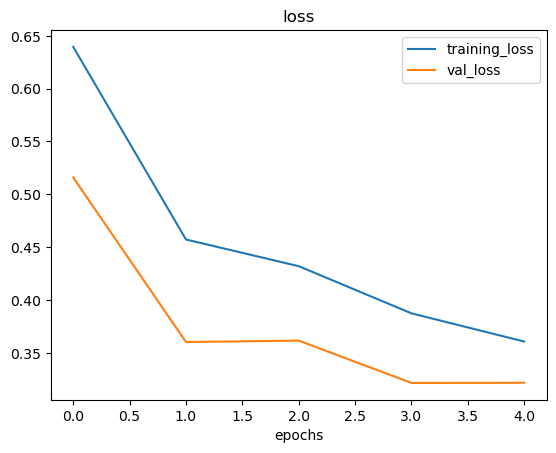

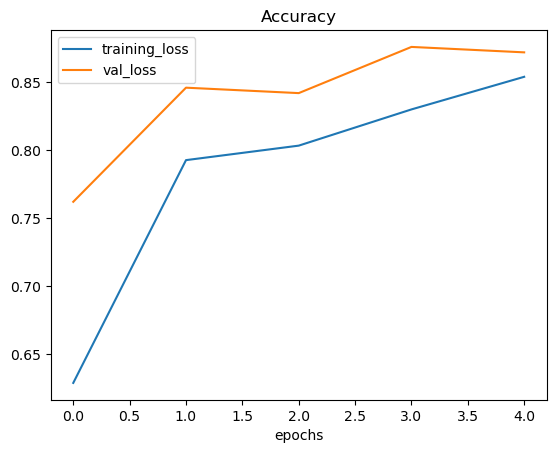

In [48]:
plot_loss_curves(history_5)

In [49]:
# Get a summary of our model with max pooling 
model_5.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)                   │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 111, 111, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 109, 109, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 54, 54, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 52, 52, 10)          │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 26, 26, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 6760)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │           6,761 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,585 (103.85 KB)

 Trainable params: 8,861 (34.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,724 (69.24 KB)

### Opening our bag of tricks and finding data augmentation

In [82]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1./255.,
                                            rotation_range=0.2, # How much do you want to rotate an image?
                                            shear_range=0.2, # How much do you want to shear an image
                                            zoom_range=0.2, # Zoom in randomly on an image
                                            width_shift_range=0.2, # Move your image around x axis
                                            height_shift_range=0.3, # Move you image around y axis
                                            horizontal_flip=True) # Do you want to flip an image


# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augmentation for the test dataset 
test_datagen = ImageDataGenerator(rescale=1/255.)

> **Question:** What is Data Augmentation?
> 
Data Augmentation is the process of altering our training data, leading it to have more diversity and in turn allowing our models to learn more generalizable (hopefully) patterns.
Altering might mean adjusting the rotation of an image, flipping it, cropping it etc...

Let's write some code to visualize data augmentation...

In [83]:
# Import data and augment it from training directory 
print('Augmented training data')
train_data_augmented = train_datagen_augmented.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False # for demonstration purposes only    
)

# Create non-augmented train data batches 
train_data = train_datagen.flow_from_directory(train_dir,
                                             target_size=(224, 224),
                                                batch_size=32,
                                                class_mode='binary',
                                                shuffle=False )

test_data = test_datagen.flow_from_directory(test_dir,
                                            target_size=(224, 224),
                                            batch_size=32,
                                            class_mode='binary')

Augmented training data
Found 1504 images belonging to 2 classes.
Found 1504 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


**Note:** Data augmentation is usuallly only performed on the training data. Using `ImageDataGenerator` built-in data augmentation parameters our images are left as they are in the directories but are modified as they're loaded into the model.

Finally... let's visualize some augmented data!!!

In [84]:
# Get sample augmented data batches 
images, labels = next(train_data)
augmented_images, augmented_labels = next(train_data_augmented)

showing image number: 13


(-0.5, 223.5, 223.5, -0.5)

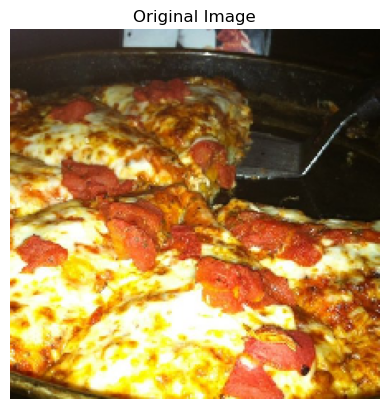

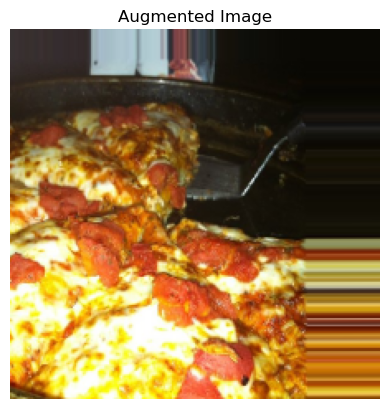

In [86]:
# Show original image and augmented image
import random 
random_number = random.randint(0, 31) # our batch sizes are 32..
print(f'showing image number: {random_number}')
plt.imshow(images[random_number])
plt.title(f"Original Image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented Image")
plt.axis(False)

Now we've seen what augmented training data looks like, let's build a model and see how it learns on augmented data

In [87]:
# Create a model (same as model_5)
# Create the model (this is going to be our new baseline)
model_6 = Sequential([
    Input(shape=(224, 224, 3)),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

# Compile a model 
model_6.compile(
    loss='binary_crossentropy',
    optimizer=Adam(),
    metrics=['accuracy']
)

# Fit the model 
history_6 = model_6.fit(
    train_data_augmented,
    epochs=5,
    steps_per_epoch=len(train_data_augmented),
    validation_data=test_data,
    validation_steps=len(test_data))


C:\Users\yashs\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 25s 501ms/step - accuracy: 0.4529 - loss: 0.7126 - val_accuracy: 0.5400 - val_loss: 0.6879
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 22s 477ms/step - accuracy: 0.4822 - loss: 0.6937 - val_accuracy: 0.7020 - val_loss: 0.6790
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 23s 481ms/step - accuracy: 0.5856 - loss: 0.6883 - val_accuracy: 0.5360 - val_loss: 0.6540
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 23s 481ms/step - accuracy: 0.5366 - loss: 0.6855 - val_accuracy: 0.7620 - val_loss: 0.6035
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 22s 475ms/step - accuracy: 0.6759 - loss: 0.6299 - val_accuracy: 0.6880 - val_loss: 0.5306


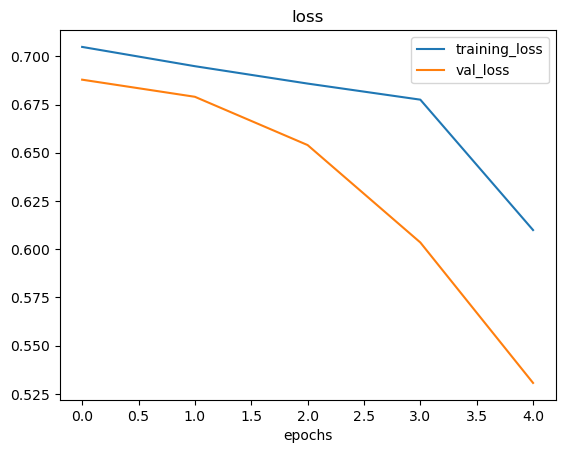

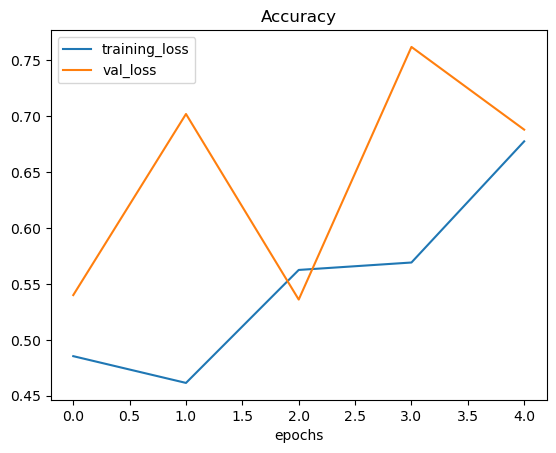

In [88]:
plot_loss_curves(history_6)

**It is not better with augmentation what about we shuffle our augmented training data and train another model (the same as before) and see what happens.**

In [92]:
# Import data and augment it and shuffle from training directory
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                 target_size=(224, 224),
                                                                 shuffle=True,
                                                                 batch_size=32,
                                                                 class_mode='binary')

Found 1504 images belonging to 2 classes.


In [93]:
# Create the model (same as model_5 and model_6)
model_7 = Sequential([
    Input(shape=(224, 224, 3)),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

model_7.compile(
    loss='binary_crossentropy',
    optimizer=Adam(),
    metrics=['accuracy']
)

history_7 = model_7.fit(
    train_data_augmented_shuffled,
    epochs=5,
    steps_per_epoch=len(train_data_augmented),
    validation_data=test_data,
    validation_steps=len(test_data))

C:\Users\yashs\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 23s 461ms/step - accuracy: 0.4799 - loss: 0.7114 - val_accuracy: 0.5220 - val_loss: 0.6859
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 457ms/step - accuracy: 0.5474 - loss: 0.6824 - val_accuracy: 0.5560 - val_loss: 0.6533
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 457ms/step - accuracy: 0.6712 - loss: 0.6171 - val_accuracy: 0.8460 - val_loss: 0.4256
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 455ms/step - accuracy: 0.7516 - loss: 0.5359 - val_accuracy: 0.8120 - val_loss: 0.4103
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 22s 457ms/step - accuracy: 0.7474 - loss: 0.4939 - val_accuracy: 0.8540 - val_loss: 0.3446


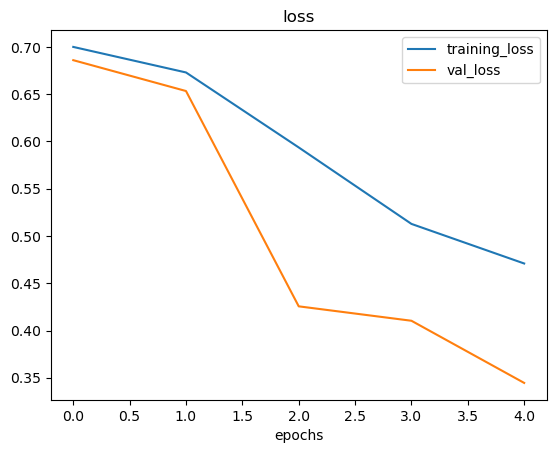

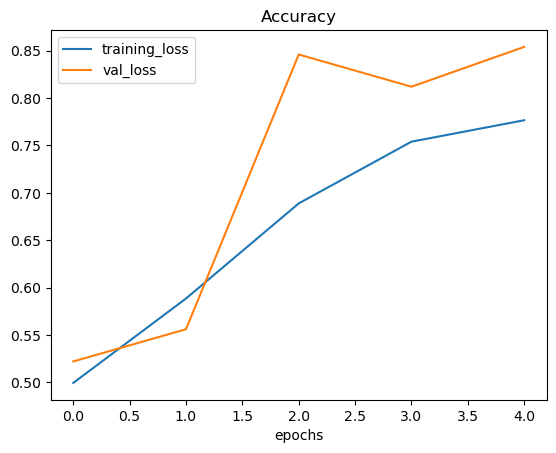

In [94]:
# Plot loss curves 
plot_loss_curves(history_7)

### 7. Repeat until satisfied

since we've already beaten our baseline, there are a few things we could try to continue to improve our model:

* Increase the number of model layers
* Increase the number of filters in each convolutional layer
* Train for longer (more epochs)
* Find an ideal learning rate
* Get more data (give the model model opportunities to learn)
* Use **transfer learning** to leverage what another image model has learned and adjust it for our own use case.

> **Practice:** Recreate the model on the CNN explainer website (same as `model_1`) and see how it performs on the augmented shuffled training data.

In [96]:
# Recreating model 1 and train it with augmented shuffled data 
model_8 = Sequential([
    Input(shape=(224, 224, 3)),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
    
])

# Compile the model 
model_8.compile(
    loss='binary_crossentropy',
    optimizer=Adam(),
    metrics=['accuracy']
)

# Fit the model 
history_8 = model_8.fit(
    train_data_augmented_shuffled,
    steps_per_epoch=len(train_data_augmented_shuffled),
    epochs=5,
    validation_data=test_data,
    validation_steps=len(test_data)
)

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 26s 512ms/step - accuracy: 0.6019 - loss: 0.6645 - val_accuracy: 0.8280 - val_loss: 0.3987
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 24s 503ms/step - accuracy: 0.7438 - loss: 0.5326 - val_accuracy: 0.8240 - val_loss: 0.3604
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 24s 504ms/step - accuracy: 0.7396 - loss: 0.5268 - val_accuracy: 0.8640 - val_loss: 0.3543
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 24s 503ms/step - accuracy: 0.7490 - loss: 0.5310 - val_accuracy: 0.7980 - val_loss: 0.4226
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 24s 507ms/step - accuracy: 0.7937 - loss: 0.4547 - val_accuracy: 0.8460 - val_loss: 0.3489


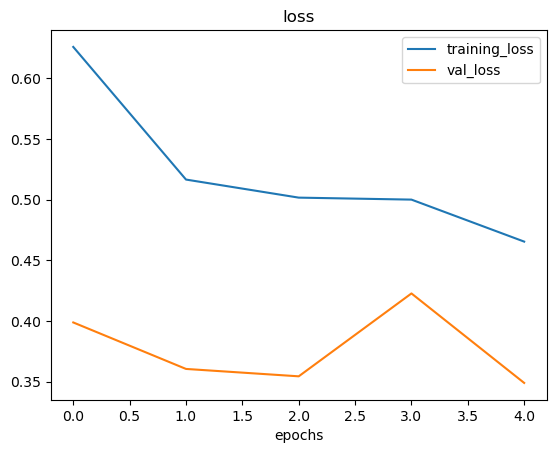

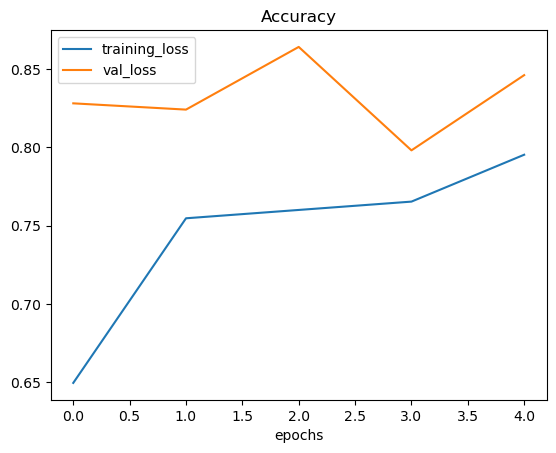

In [98]:
# Visualize the result 
plot_loss_curves(history_8)

In [99]:
# Let's compare the results 
model_1_results = pd.DataFrame(history_1.history)
model_8_results = pd.DataFrame(history_8.history)

In [100]:
model_1_results

,accuracy,loss,val_accuracy,val_loss
0,0.698000,0.570399,0.766,0.481996
1,0.750667,0.528212,0.782,0.473333
2,0.787333,0.465500,0.802,0.424246
3,0.808000,0.427920,0.852,0.374012
4,0.831333,0.369042,0.842,0.375051


In [101]:
model_8_results

,accuracy,loss,val_accuracy,val_loss
0,0.649601,0.625712,0.828,0.398724
1,0.754654,0.516437,0.824,0.360430
2,0.759973,0.501555,0.864,0.354341
3,0.765293,0.499921,0.798,0.422625
4,0.795213,0.465324,0.846,0.348906


**Observation:** It seems like both models works very similar but there is a lot of gap between train_loss and val_loss in model_8 which suggest that if we train for longer it might give good results and these are just assumptions try it out and figure it out.

In [106]:
# Let' see if our hypothesis holds
# Train model_8 for longer

model_9 = Sequential([
    Input(shape=(224, 224, 3)),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
    
])

# Compile the model 
model_9.compile(
    loss='binary_crossentropy',
    optimizer=Adam(),
    metrics=['accuracy']
)

# Fit the model 
history_9 = model_9.fit(
    train_data_augmented_shuffled,
    steps_per_epoch=len(train_data_augmented_shuffled),
    epochs=20,
    validation_data=test_data,
    validation_steps=len(test_data)
)

Epoch 1/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 25s 494ms/step - accuracy: 0.5852 - loss: 0.6678 - val_accuracy: 0.7700 - val_loss: 0.4713
Epoch 2/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 23s 494ms/step - accuracy: 0.7499 - loss: 0.5182 - val_accuracy: 0.8340 - val_loss: 0.4095
Epoch 3/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 23s 494ms/step - accuracy: 0.7778 - loss: 0.4827 - val_accuracy: 0.8220 - val_loss: 0.4021
Epoch 4/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 23s 498ms/step - accuracy: 0.7841 - loss: 0.4820 - val_accuracy: 0.8800 - val_loss: 0.3090
Epoch 5/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 23s 496ms/step - accuracy: 0.7996 - loss: 0.4638 - val_accuracy: 0.8760 - val_loss: 0.2839
Epoch 6/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 23s 498ms/step - accuracy: 0.8122 - loss: 0.4290 - val_accuracy: 0.8780 - val_loss: 0.2890
Epoch 7/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 24s 500ms/step - accuracy: 0.8049 - loss: 0.4184 - val_accuracy: 0.8840 - val_loss: 0.2814
Epoch 8/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 23s 499ms/step - accuracy: 0.8474 - loss: 0.3708 - val_accu

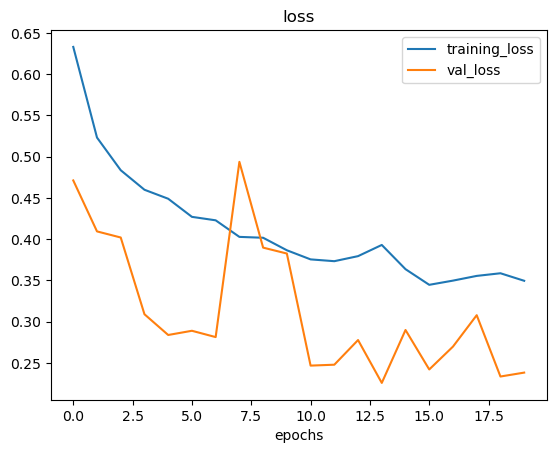

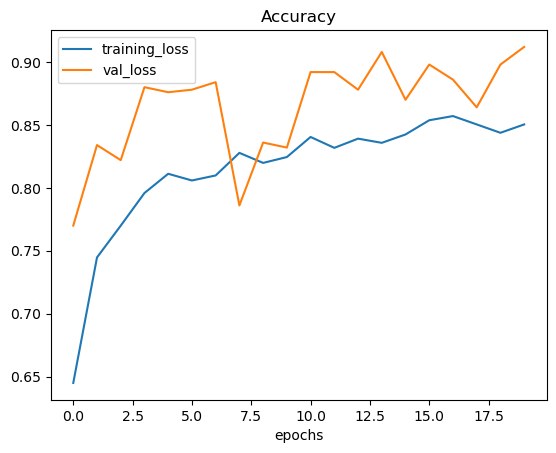

In [108]:
plot_loss_curves(history_9)

**Amazing 91% Validation Accuracy**

**Note: What would happen if i delete those images which our inappropriate we have seen those above will it increase the accuracy little bit? let's find out**

In [150]:
# Delete images that doesn't seems right to me.
import os

# List of images to delete
files_to_delete = [
    'pizza_steak/train/pizza/1407753.jpg',
    'pizza_steak/train/pizza/3826377.jpg',
    'pizza_steak/train/steak/1340977.jpg',
    'pizza_steak/train/steak/165964.jpg'
]

# Loop and delete
for file_path in files_to_delete:
    try:
        os.remove(file_path)
        print(f"Deleted: {file_path}")
    except FileNotFoundError:
        print(f"File not found, skipping: {file_path}")
    except Exception as e:
        print(f"Error deleting {file_path}: {e}")


Deleted: pizza_steak/train/pizza/1407753.jpg
Deleted: pizza_steak/train/pizza/3826377.jpg
Deleted: pizza_steak/train/steak/1340977.jpg
Deleted: pizza_steak/train/steak/165964.jpg


In [153]:
# Reload the data


# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1./255.,
                                            rotation_range=0.2, # How much do you want to rotate an image?
                                            shear_range=0.2, # How much do you want to shear an image
                                            zoom_range=0.2, # Zoom in randomly on an image
                                            width_shift_range=0.2, # Move your image around x axis
                                            height_shift_range=0.3, # Move you image around y axis
                                            horizontal_flip=True) # Do you want to flip an image


# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augmentation for the test dataset 
test_datagen = ImageDataGenerator(rescale=1/255.)


# Import data and augment it from training directory 
print('Augmented training data')
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=True   
)

# Create non-augmented train data batches 
train_data = train_datagen.flow_from_directory(train_dir,
                                             target_size=(224, 224),
                                                batch_size=32,
                                                class_mode='binary',
                                                shuffle=True )

test_data = test_datagen.flow_from_directory(test_dir,
                                            target_size=(224, 224),
                                            batch_size=32,
                                            class_mode='binary')

Augmented training data
Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [154]:
# Retrain model 9

model_10 = Sequential([
    Input(shape=(224, 224, 3)),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
    
])

# Compile the model 
model_10.compile(
    loss='binary_crossentropy',
    optimizer=Adam(),
    metrics=['accuracy']
)

# Fit the model 
history_10 = model_10.fit(
    train_data_augmented_shuffled,
    steps_per_epoch=len(train_data_augmented_shuffled),
    epochs=20,
    validation_data=test_data,
    validation_steps=len(test_data)
)

C:\Users\yashs\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 25s 493ms/step - accuracy: 0.5271 - loss: 0.6938 - val_accuracy: 0.7080 - val_loss: 0.5453
Epoch 2/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 23s 486ms/step - accuracy: 0.7083 - loss: 0.5743 - val_accuracy: 0.8240 - val_loss: 0.4205
Epoch 3/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 23s 487ms/step - accuracy: 0.7398 - loss: 0.5347 - val_accuracy: 0.8400 - val_loss: 0.4053
Epoch 4/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 23s 499ms/step - accuracy: 0.7601 - loss: 0.5107 - val_accuracy: 0.8520 - val_loss: 0.3889
Epoch 5/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 23s 489ms/step - accuracy: 0.7621 - loss: 0.5083 - val_accuracy: 0.8540 - val_loss: 0.3612
Epoch 6/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 23s 490ms/step - accuracy: 0.7907 - loss: 0.4448 - val_accuracy: 0.8600 - val_loss: 0.3529
Epoch 7/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 23s 494ms/step - accuracy: 0.7809 - loss: 0.4624 - val_accuracy: 0.8540 - val_loss: 0.3661
Epoch 8/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 23s 492ms/step - accuracy: 0.7968 - loss: 0.4487 - val_accu

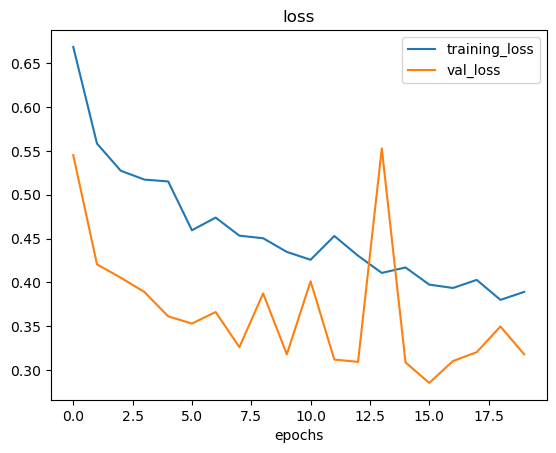

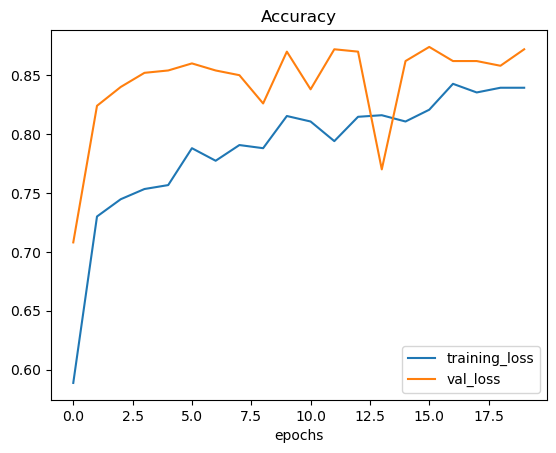

In [155]:
plot_loss_curves(history_10)

**Model_9 still better that's okayy**

## Making a prediction with our trained model on our own custom data

In [112]:
# Classes we're working with 
print(class_names)

['pizza' 'steak']


In [124]:
# View our example image 
import wget
wget.download('https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg')


100% [..........................................................................] 1978213 / 1978213

'03-steak.jpeg'

Text(0.5, 1.0, 'Steak')

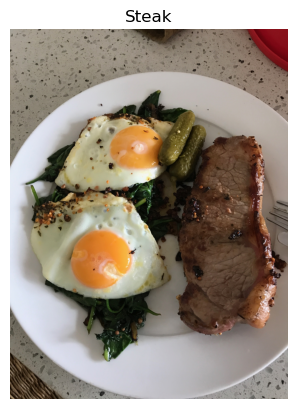

In [127]:
import matplotlib.image as mpimg
steak = mpimg.imread('03-steak.jpeg')
plt.imshow(steak)
plt.axis('off')
plt.title("Steak")

In [128]:
# Chec the shape of our image 
steak.shape

(4032, 3024, 3)

In [135]:
expanded_steak = tf.expand_dims(steak, axis=0)

In [136]:
expanded_steak.shape

TensorShape([1, 4032, 3024, 3])

In [137]:
# Create a function to import and image and resize it to be able to be used with our model 
def load_and_prep_image(filename, img_shape=224):
    """
    Reads an image from filename, turns in into a tensor and reshape it to (img_shape, img_shape, color_channels).
    """
    # Read in the image 
    img = tf.io.read_file(filename=filename)
    # Decode the read file into a tensor 
    img = tf.image.decode_image(img)
    # Resize the image 
    img = tf.image.resize(img, size=[img_shape, img_shape])
    # Rescale the image (get all values b/w 0 and 1)
    img = img/255.
    return img
    

In [138]:
# Load in and preprocess our custom image 
steak = load_and_prep_image('03-steak.jpeg')

In [139]:
steak.shape

TensorShape([224, 224, 3])

In [140]:
steak_expanded = tf.expand_dims(steak, axis=0)

In [142]:
steak_expanded.shape

TensorShape([1, 224, 224, 3])

In [145]:
pred = model_9.predict(steak_expanded)
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


array([[0.91802925]], dtype=float32)

In [144]:
class_names

array(['pizza', 'steak'], dtype='<U5')

Looks like our custom image is being put through our model, however, it currently outputs prediction probs, wouldn't it be nice if we could visualize the image as well as the model's prediction?

In [146]:
# We can index the predicted class by rounding the prediction probs and indexing it on class names 
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [147]:
def pred_and_plot(model, filename, class_names=class_names):
    """
    Imports an image located at filename, makes a prediction with model
    and plots the image with the predicted class as the title"""

    # Import the target iamge and preprocess it 
    img = load_and_prep_image(filename)

    # Make a prediction 
    pred = model.predict(tf.expand_dims(img, axis=0))

    # Get the predicted class 
    pred_class = class_names[int(tf.round(pred))]

    # Plot the image and predicted class
    plt.imshow(img)
    plt.title(f'Prediction: {pred_class}')
    plt.axis(False);

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


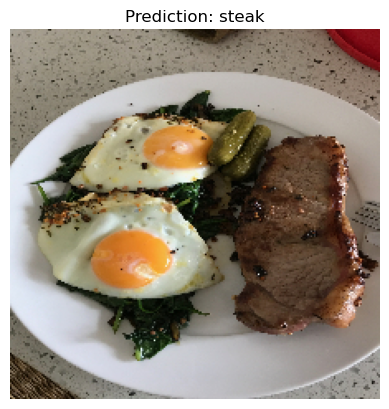

In [148]:
# Test our model on a custom image 
pred_and_plot(model_9, '03-steak.jpeg')

## Multi-class Image Classification

We've just been through a bunch of the following steps with a binary classification problem (pizza vs steak), now we're going to step things up a notch with 10 classes of food (multiclass classification).

1. Become one with the data
2. Preprocess the data (get it ready for a model)
3. Create a model (start with a baseline)
4. Fit the model (overfit it to make sure it works)
5. Evaluate the model
6. Adjust different hyperparameters and improve the model (try to beat baseline/reduce overfitting)
7. Repeat until satisfied